In [73]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [74]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Bupa\Bupa_NW_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6
0,85.0,92,45.0,27.0,31.0,0.0
1,85.0,64,59.0,32.0,23.0,0.0
2,86.0,54,NaN,16.0,54.0,NaN
3,91.0,78,34.0,24.0,36.0,NaN
4,NaN,55,13.0,17.0,17.0,NaN
...,...,...,...,...,...,...
340,NaN,54,25.0,22.0,35.0,4.0
341,89.0,48,32.0,NaN,14.0,4.0
342,85.0,52,NaN,23.0,34.0,4.0
343,95.0,93,NaN,27.0,47.0,6.0


In [75]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	90
int64		column 2	0
float64		column 3	112
float64		column 4	44
float64		column 5	68
float64		column 6	88


In [76]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6
count,255.000000,345.000000,233.000000,301.000000,277.000000,257.000000
mean,90.000000,69.869565,30.330472,24.588040,38.920578,3.256809
std,4.168687,18.347670,17.556013,9.859499,40.017218,3.021764
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000
25%,88.000000,57.000000,21.000000,19.000000,16.000000,0.500000
50%,90.000000,67.000000,27.000000,23.000000,26.000000,3.000000
75%,92.000000,80.000000,33.000000,27.000000,43.000000,5.000000
max,102.000000,138.000000,155.000000,82.000000,297.000000,16.000000


<AxesSubplot:>

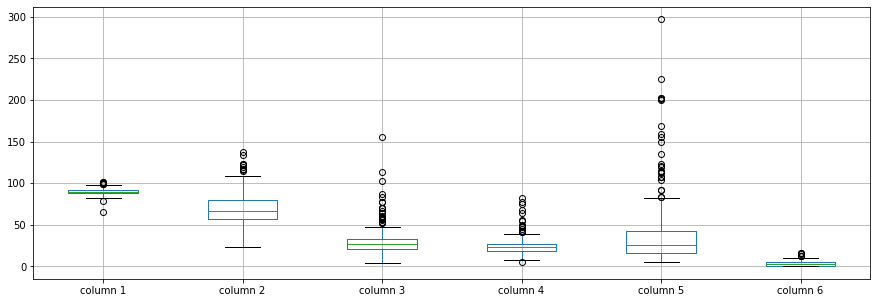

In [77]:
df.boxplot(return_type='axes', figsize=(15,5))

In [78]:

df.mean()

column 1    90.000000
column 2    69.869565
column 3    30.330472
column 4    24.588040
column 5    38.920578
column 6     3.256809
dtype: float64

In [79]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6
column 1,1.000000,0.029158,0.003115,0.118109,0.220568,0.288738
column 2,0.029158,1.000000,0.112255,0.163921,0.105491,-0.001558
column 3,0.003115,0.112255,1.000000,0.623511,0.402745,0.092444
column 4,0.118109,0.163921,0.623511,1.000000,0.483570,0.133391
column 5,0.220568,0.105491,0.402745,0.483570,1.000000,0.240980
column 6,0.288738,-0.001558,0.092444,0.133391,0.240980,1.000000


In [80]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [81]:
imputer = md.Midas(layer_structure = [6,6+37,6+37+37,6+37+37+37,6+37+37+37+37,6+37+37+37,6+37+37,6+37,6], vae_layer = False, seed = 370)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [6]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 230.76287260509673
Epoch: 1 , loss: 230.7349613734654
Epoch: 2 , loss: 229.603517078218
Epoch: 3 , loss: 230.7916259765625
Epoch: 4 , loss: 230.3574945359003
Epoch: 5 , loss: 229.6413821265811
Epoch: 6 , loss: 228.72857956659226
Epoch: 7 , loss: 229.27803911481584
Epoch: 8 , loss: 230.33140781947546
Epoch: 9 , loss: 230.0867200578962
Epoch: 10 , loss: 229.82389686221168
Epoch: 11 , loss: 230.87373788016183
Epoch: 12 , loss: 230.06539844331286
Epoch: 13 , loss: 230.56566583542596
Epoch: 14 , loss: 229.2542739141555
Epoch: 15 , loss: 229.6260005405971
Epoch: 16 , loss: 230.10889979771204
Epoch: 17 , loss: 229.30344935825892
Epoch: 18 , loss: 229.68848310198103
Epoch: 19 , loss: 230.48548162551154
Epoch: 20 , loss: 228.95735531761534
Epoch: 21 , loss: 229.90999203636534
Epoch: 22 , loss: 230.11538405645462
Epoch: 23 , loss: 228.92761739095053
Epoch: 24 , loss: 228.6945531935919
Epoch: 25 , loss: 230.552963

In [64]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(345, 6)

In [65]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    90.0000
column 2    47.0000
column 3    28.0000
column 4     0.0475
column 5    18.0000
column 6     0.5000
Name: 21, dtype: float64

In [66]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Bupa.xlsx', header=None,names=column_names)

In [67]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6
0,0.000000,0,0.000000,0.000000,0.0,0.000000
1,0.000000,0,0.000000,0.000000,0.0,0.000000
2,0.000000,0,-32.950060,0.000000,0.0,0.050079
3,0.000000,0,0.000000,0.000000,0.0,0.042774
4,-97.960243,0,0.000000,0.000000,0.0,0.039455
...,...,...,...,...,...,...
340,-90.959130,0,0.000000,0.000000,0.0,0.000000
341,0.000000,0,0.000000,-21.951981,0.0,0.000000
342,0.000000,0,-21.962981,0.000000,0.0,0.000000
343,0.000000,0,-20.966148,0.000000,0.0,0.000000


Calculating NRMSE Value

In [68]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [69]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [70]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

1055.6090470073007

In [71]:
denominator=Frobenius_norm(complete_df)
denominator

2519.762091944396

In [72]:
NRMS=numerator/denominator
NRMS


0.4189320294888359

In [19]:
new_df.iloc[66,:]

column 1    86.000000
column 2    54.000000
column 3    20.000000
column 4    21.000000
column 5    45.817398
column 6     2.000000
Name: 66, dtype: float64

In [22]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6
0,85,92.000000,45,27.0,31.0,2.653014
1,85,18.580963,59,32.0,23.0,0.000000
2,86,54.000000,33,16.0,54.0,0.015938
3,91,78.000000,34,24.0,36.0,0.000000
4,98,55.000000,13,17.0,17.0,0.000000
...,...,...,...,...,...,...
340,91,54.000000,25,22.0,35.0,4.000000
341,89,48.000000,32,22.0,14.0,4.000000
342,85,52.000000,22,23.0,34.0,4.000000
343,95,27.782209,21,27.0,47.0,6.000000


In [23]:
imputations[-1].to_excel("Bupa_NW_20(imp).xlsx", index=False, header=False)